<font size=8 color=darkblue> Atividade de filtros

In [254]:
import numpy as np 
import skimage
from skimage.io import imsave, imread, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

Crie um algoritmo que implemente filtros de convolução. O algoritmo deverá receber como
parâmetro a imagem a ser processada, o filtro e o tratamento a ser feito na borda. A função,
obrigatoriamente, deverá seguir a seguinte nomenclatura

A imagem poderá ser colorida ou em tons de cinza. No caso de imagens coloridas, o
processamento deverá ser feito em cada banda de cor o resultado será retornado em
uma única imagem;

O filtro será uma matrix MxN, onde M e N são
o Ímpares;
o Maiores ou iguais a 3;
o Menores que o tamanho da imagem (em cada dimensão).

O parâmetro borda deverá ter 4 valores possíveis:
o ‘ignore’: nesse caso a borda não será processada;
o ‘espelho’: no tratamento da borda os pixels serão espelhados;
o ‘zero’: o tratamento da borda será adicionando pixels de valor zero;
o ‘replicar’: nesse caso, no tratamento da borda somente os pixels das linhas
extremas serão replicados.

Teste a função de convolução com pelo menos 5 filtros diferentes. Explique os
resultados.

In [322]:
class Filter():
    
    def __init__(self):
        pass
        
    def selectFilter(self, filt):
        filEsc = None 
        
        if  filt == "ident": 
            filEsc = [[0, 0, 0],
                    [0, 1,0] ,
                    [0, 0, 0]]
            
        elif filt == "laplace":
           
            filEsc = [[0,-1,0],
                    [-1,4,-1],
                    [0,-1,0]]
     
                       
        elif filt == "boxblur": 
            filEsc = [[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]
                    
        elif filt == "gaussian": 
           filEsc=  [[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]]
            
                    
        elif filt == "sharpen":
            filEsc = [[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]]
                    
        elif filt == "mikasFilter" : 
            filEsc = [[0, 5, 0],
                      [7, 0, 3],
                      [0, 1, 0]]
            
        elif filt == 'media':
            filEsc = [[1/9, 1/9,1/9],
                      [1/9, 1/9,1/9],
                      [1/9, 1/9,1/9]]
    
            
        return filEsc
        
        
    def mult(self,kernel,filt):
        return sum([sum(i) for i in (kernel * filt)])/9
    
    def multLinear(self,kernel,filt):
        value = None

        if filt == "median":
            value = np.median([np.median(i) for i in kernel])
            
        if filt == "min":
            value = min([min(i) for i in kernel])
            
        if filt == "max":
            value = max([max(i) for i in kernel])
            
        if filt == "moda":
            value = statistics.mode([statistics.mode(i) for i in kernel])
    
        return value          
        
    def kernelSize(self, tam):
        return int((tam -1)/2 )

        
    def border(self,image,border, m, n):
        linhas = self.kernelSize(m)
        colunas = self.kernelSize(n)
        
        if border == "zeros":
            zeros = np.zeros(image.shape[1])
            for i in range(linhas):
                image = np.vstack([zeros,image,zeros])
                
            for i in range(colunas):
                zeros = np.zeros(image.shape[0])
                image = np.insert(image, 0, values=zeros, axis=1)
                image = np.insert(image,  image.shape[1]-1, values=zeros, axis=1)
        
        
        elif border == "espelhamento":
            cont = 0
            for i in range(linhas):
                image = np.vstack([image[cont],image,image[(image.shape[0]-1) - cont]])
                cont += 2
                
            cont = 0
            for i in range(colunas):
                image = np.insert(image, 0, values=image[:,cont], axis=1)
                image = np.insert(image, image.shape[1]-1, values=image[:, (image.shape[1]-1) - cont], axis=1)
                cont += 2
            
            
        elif border == "replica":
            for i in range(linhas):
                image = np.vstack([image[0],image,image[image.shape[0]-1]])
                
            for i in range(colunas):
               image = np.insert(image, 0, values=image[:,0], axis=1)
               image = np.insert(image,image.shape[1]-1, values=image[:,image.shape[1]-1], axis=1)
        
        else:
            image = None
        
        return image


In [242]:
def conv(image, fil, border, m , n, linear ):
    
    f = Filter()
      
    imgPre = np.zeros(image.shape)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            #i maior que centro do kernel, não há borda
          
            if i + m < image.shape[0] and j + n <  image.shape[1] and i >= f.kernelSize(m) and j >= f.kernelSize(n): 
                if linear:
                    imgPre[i][j] = f.mult(image[i: i +m, j : j + n], f.selectFilter(fil))
                else: 
                    imgPre[i][j] = f.multLinear(image[i: i +m, j : j + n], fil)
                
            elif border != "Ignore":
                imgF = f.border(image,border,3,3)
                if not imgPre is None:
    
                    if i != 0 or j != 0:
                        linha = f.kernelSize(m)
                        coluna = f.kernelSize(n)
                        
                        if linear:
                            imgPre[i][j] = f.mult(imgF[linha: linha + m, coluna : coluna + n], f.selectFilter(fil))
                        else:
                            imgPre[i][j] = f.multLinear(imgF[linha: linha + m, coluna : coluna + n], fil)
    
                    else: 
                        if linear: 
                            imgPre[i][j] = f.mult(imgF[i: i + m, j : j + n], f.selectFilter(fil))
                        else:
                            imgPre[i][j] = f.multLinear(imgF[i: i + m, j : j + n], fil)
                
          
            
    return imgPre

In [273]:
def applyFilter(image, filt, border,m, n, linear):
    
    if len(image.shape)  == 3:
        r = image[:,:,0].astype(float)
        g = image[:,:,1].astype(float)
        b = image[:,:,2].astype(float)

      
        r = conv(r,filt,border,m,n,linear).astype(int)
        g = conv(g,filt,border,m,n,linear).astype(int)
        b = conv(b,filt,border,m,n,linear).astype(int)
        

        img = np.dstack((r,g,b))
        
    else:
        img = conv(image,filt,border,m,n,linear)
        
    return img
        

<font size=6> Teste a função de convolução com pelo menos 5 filtros diferentes. Explique os
resultados.

In [324]:
image = imread("images/romuere.jpg")
#imshow(img)
filters = ["ident","mikasFilter","gaussian","boxblur","sharpen"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


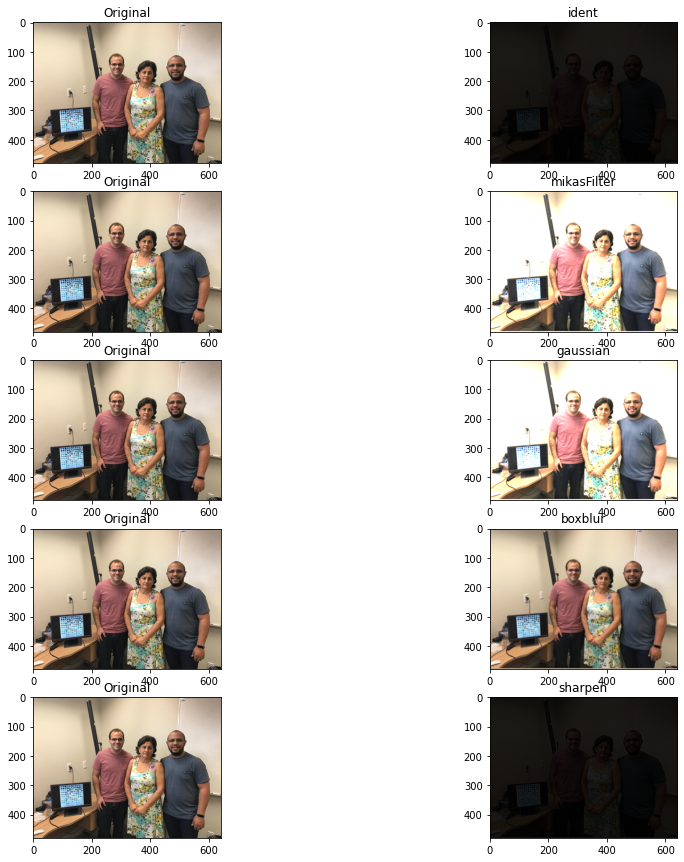

In [325]:
fig, axis = plt.subplots(5,2,figsize=(15,15))
for i in range(5):
 
    axis[i,0].imshow(image,cmap="gray")
    axis[i,0].set_title("Original")
    
    imgL = applyFilter(image,filters[i], "espelhamento", 3,3,True)
    axis[i,1].imshow(imgL, cmap="gray")
    axis[i,1].set_title(filters[i])

 

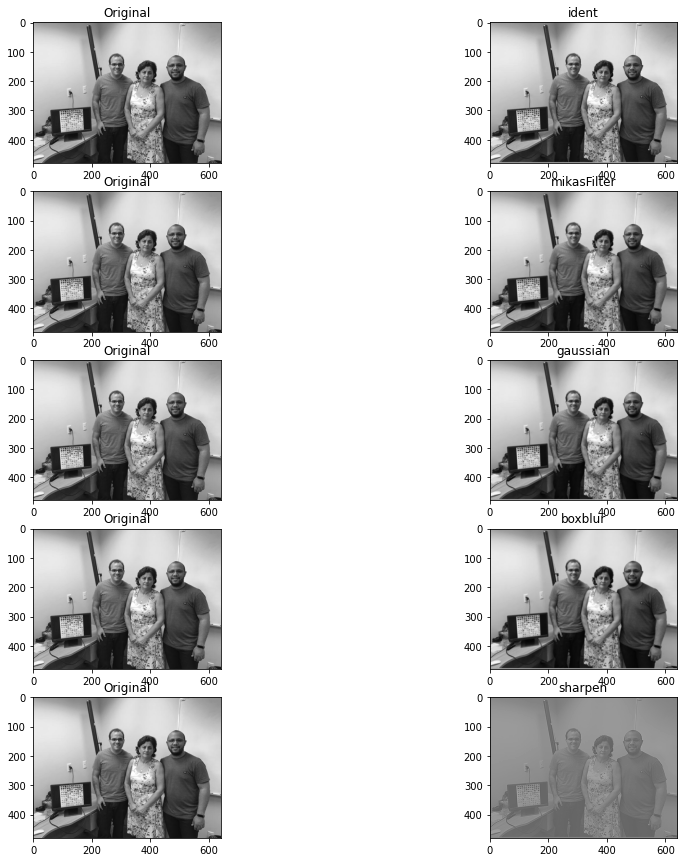

In [272]:
fig, axis = plt.subplots(5,2,figsize=(15,15))
image  = rgb2gray(image)
for i in range(5):
 
    axis[i,0].imshow(image,cmap="gray")
    axis[i,0].set_title("Original")
    
    imgL = applyFilter(image,filters[i], "espelhamento", 3,3,True)
    axis[i,1].imshow(imgL, cmap="gray")
    axis[i,1].set_title(filters[i])


(500, 1000)


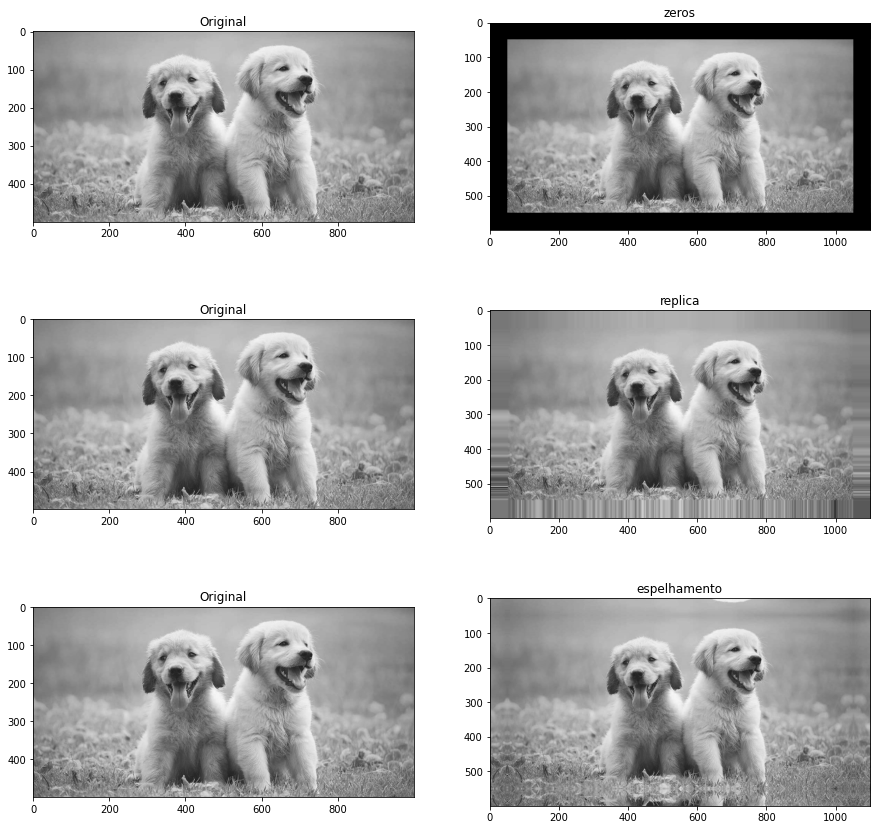

In [289]:
image = imread("images/199.imagens-bonitas-para-perfil.jpg")
#imshow(img)
image  = rgb2gray(image)
border = ["zeros","replica","espelhamento"]
f = Filter()
fig, axis = plt.subplots(3,2,figsize=(15,15))
print(image.shape)
for i in range(3):
 
    axis[i,0].imshow(image,cmap="gray")
    axis[i,0].set_title("Original")
    
    imgL = f.border(image,border[i],101,101)
    
    axis[i,1].imshow(imgL,cmap="gray")
    axis[i,1].set_title(border[i])
    
    

<font size=6> 2) Crie uma função para aplicar filtros não-lineares, os filtros possíveis deverão ser o seguinte:

In [303]:
image = imread("images/as-chuvas-foram-um-espelho-dagua-fantastico-no-salar-do-uyuni-1441823097980_300x200.jpg")
#imshow(img)
filters = ["max","min","moda","median"]

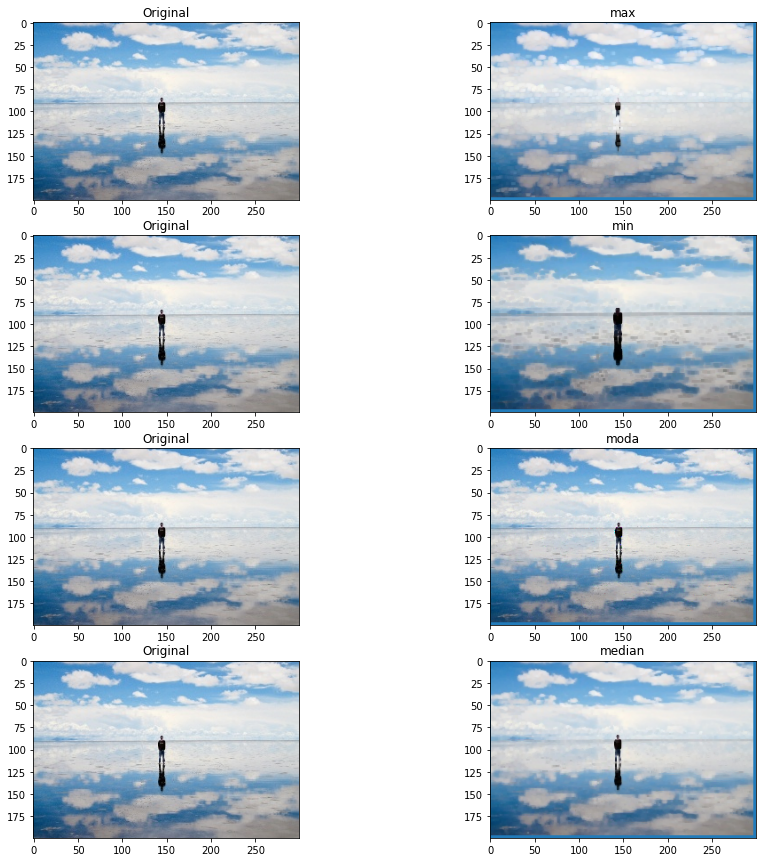

In [304]:
fig, axis = plt.subplots(4,2,figsize=(15,15))
for i in range(4):
 
    axis[i,0].imshow(image,cmap="gray")
    axis[i,0].set_title("Original")
    
    imgL = applyFilter(image,filters[i], "replica", 3,3,False)
    axis[i,1].imshow(imgL, cmap="gray")
    axis[i,1].set_title(filters[i])

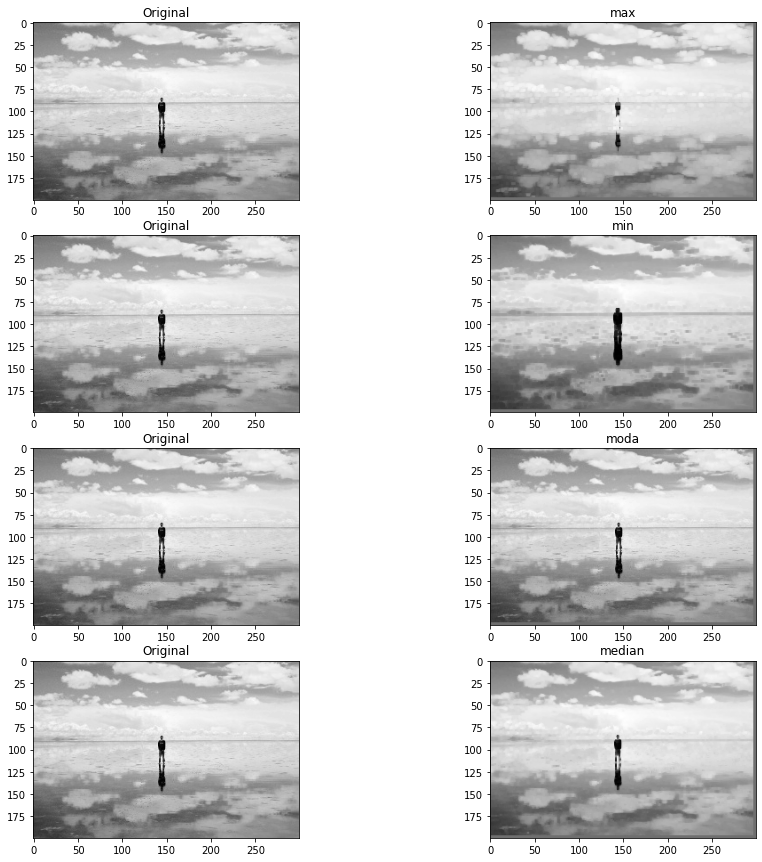

In [305]:
image  = rgb2gray(image)
fig, axis = plt.subplots(4,2,figsize=(15,15))
for i in range(4):
 
    axis[i,0].imshow(image,cmap="gray")
    axis[i,0].set_title("Original")
    
    imgL = applyFilter(image,filters[i], "replica", 3,3,False)
    axis[i,1].imshow(imgL, cmap="gray")
    axis[i,1].set_title(filters[i])

<font size=6> aplique o filtro Laplaciano em uma imagem em tons de cinza.

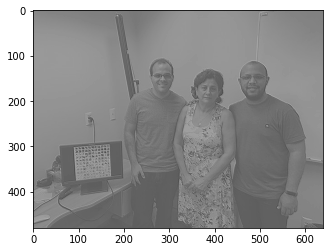

In [318]:
image = imread("images/romuere.jpg")
#imshow(img)
image  = rgb2gray(image)
imgL = applyFilter(image,"laplace" , "espelhamento", 3,3,True)
mask =  image + np.absolute(imgL)
plt.imshow(mask, cmap="gray")

<font size=6> Implemente uma máscara de nitidez e uma filtragem high-boost utilizando o algoritmo da
questão 1

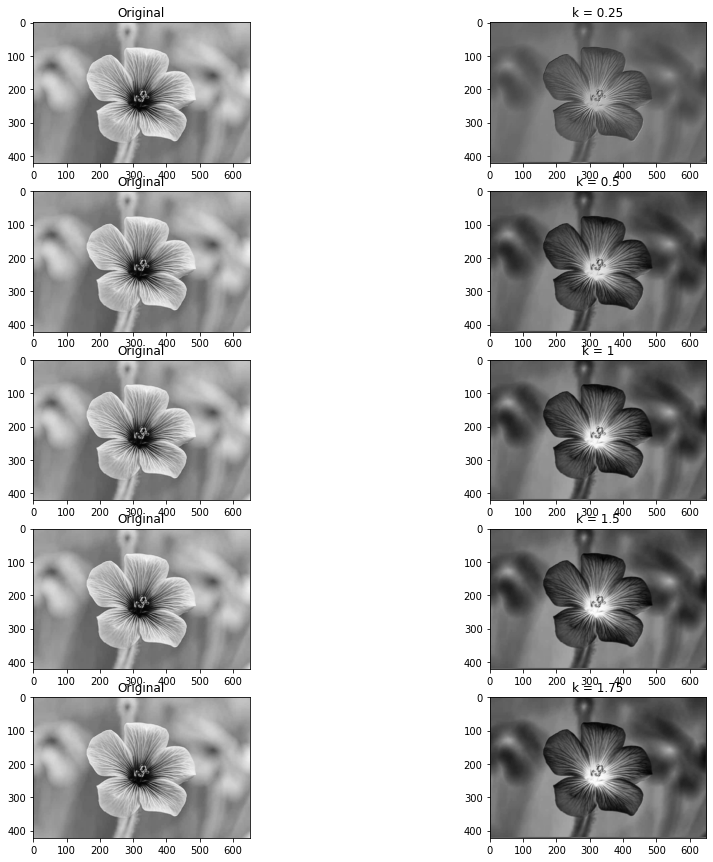

In [321]:
image = imread("images/flores-pequenas-5.jpg")
#imshow(img)
image  = rgb2gray(image)
k = [0.25, 0.5, 1, 1.5, 1.75]

fig, axis = plt.subplots(5,2,figsize=(15,15))
for i in range(5):
 
    axis[i,0].imshow(image,cmap="gray")
    axis[i,0].set_title("Original")
    
    imgL = applyFilter(image,"boxblur" , "replica", 3,3,True)
    mask = image - imgL
    gm = image + (k [i] * mask)
    axis[i,1].imshow(gm, cmap="gray")
    axis[i,1].set_title(f'k = {str(k[i])}')

<font size =6> Aplique os filtros da média e mediana em uma imagem ruidosa, o que aconteceu? Qual tipo
de ruído existia na imagem?

In [326]:
image = imread("images/romuere.jpg")
#imshow(img)
image  = rgb2gray(image)
image = skimage.util.random_noise(image, mode='s&p')



Text(0.5, 1.0, 'media')

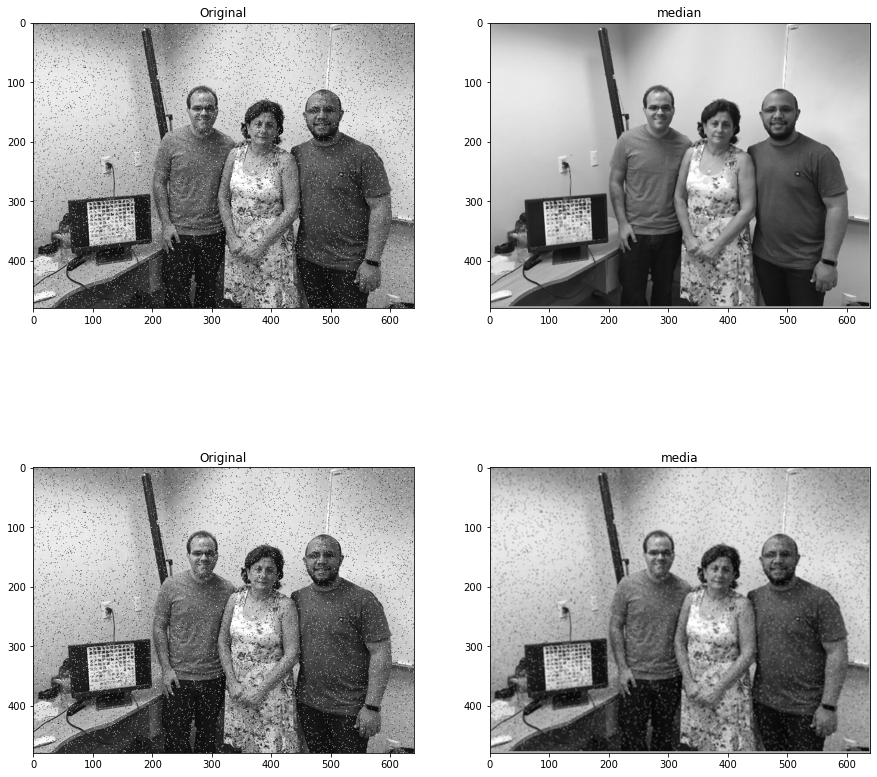

In [327]:

filters = [ "median","media"]
fig, axis = plt.subplots(2,2,figsize=(15,15))

 
axis[0,0].imshow(image,cmap="gray")
axis[0,0].set_title("Original")

imgL = applyFilter(image,"median", "replica", 3,3,False)
axis[0,1].imshow(imgL, cmap="gray")
axis[0,1].set_title(filters[0])


axis[1,0].imshow(image,cmap="gray")
axis[1,0].set_title("Original")

imgL = applyFilter(image,"media", "espelhamento", 3,3,True)
axis[1,1].imshow(imgL, cmap="gray")
axis[1,1].set_title(filters[1])